In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load the CSV file
data = pd.read_csv('purchase.csv')

# Display the first 5 rows of the file
data.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0


In [3]:
data.isnull()



,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2455859,False,False,False,False
2455860,False,False,False,False
2455861,False,False,False,False
2455862,False,False,False,False


In [4]:
data.isnull().any()

PURCHASE_DATE    False
MAGIC_KEY        False
BOX_ID            True
BOX_COUNT         True
dtype: bool

In [5]:
data.isnull().sum()

PURCHASE_DATE     0
MAGIC_KEY         0
BOX_ID           47
BOX_COUNT        47
dtype: int64

In [6]:
#removes rows or columns with missing values
data_cleaned = data.dropna()
data.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0


In [13]:
# Remove duplicate rows
data_no_duplicates = data.drop_duplicates()

data.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0


In [16]:
data.nunique()

PURCHASE_DATE        151
MAGIC_KEY        1274108
BOX_ID               291
BOX_COUNT             14
dtype: int64

In [14]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [1]:
le = LabelEncoder()
data['MAGIC_KEY'] = le.fit_transform(data['MAGIC_KEY'])
data.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,1222234,12.0,1.0
1,1/2/2019,526391,12.0,1.0
2,1/2/2019,624102,99.0,1.0
3,1/2/2019,708928,6.0,1.0
4,1/2/2019,870797,4.0,1.0


In [21]:
correlation_matrix = data.corr()
print(correlation_matrix)

           MAGIC_KEY    BOX_ID  BOX_COUNT
MAGIC_KEY   1.000000 -0.000256   0.008115
BOX_ID     -0.000256  1.000000  -0.117887
BOX_COUNT   0.008115 -0.117887   1.000000


In [18]:
import seaborn as sns

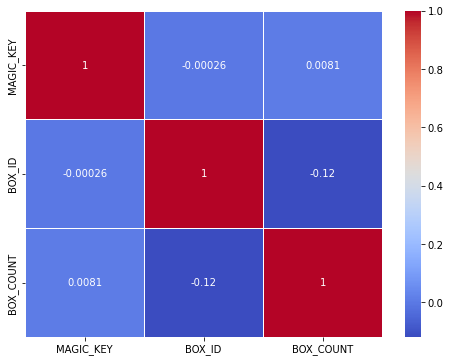

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
features = ['PURCHASE_DATE', 'MAGIC_KEY', 'BOX_ID']
X = data[features ]  # Use only the selected features
y = data['BOX_COUNT']  


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

TypeError: The DTypes <class 'numpy.dtype[int64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.